In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [408]:
df = pd.read_csv("oppgave1/data/lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Rensing og omgjøring av datasettet

In [409]:
# Fjerner forklaringsvariabler vi ikke trenger
df2 = df[["Set_Name", "Theme", "Price", "Pieces", "Pages", "Minifigures", "Unique_Pieces"]]

# Fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# Gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# Fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'].astype(str)
df2['Price'] = df2['Price'].str.replace(r'\$', '', regex = True)

# Gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# Display av det renskede settet:
df2


,Set_Name,Theme,Price,Pieces,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,7.99,95.0,40.0,1.0,52.0
16,Woody & RC,Disney,9.99,69.0,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,7.99,85.0,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,7.99,93.0,40.0,2.0,48.0
19,Police Patrol Car,City,9.99,92.0,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,249.99,3306.0,404.0,3.0,484.0
1172,Tree House,Ideas,199.99,3036.0,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,249.99,3120.0,464.0,6.0,525.0


## Variabler for varemerke og ikke varemerke

In [410]:
mythemes_brands = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid']
mythemes_notBrands = ['Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 
                      'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education']
mythemes_unclearBrands = ['Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']
mythemes_all = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid', 'Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side',
                   'Classic', 'Juniors', 'Creator 3-in-1', 'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education',
                   'Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']

## Tar hensyn til varemerke i en egen kategori (brukt i mlr)

In [436]:
unclear_conditions = df2['Theme'].isin(mythemes_unclearBrands)
original_conditions = df2['Theme'].isin(mythemes_notBrands)
brand_conditions = df2['Theme'].isin(mythemes_brands)

# Oppretter en ny kolonne i datasettet som skal videre brukes for å svare på problemstillingen
df2['Varemerke'] = np.select([unclear_conditions, original_conditions, brand_conditions], ['Unclear', 'Original', 'Brand'])

dummy_vars = pd.get_dummies(df2['Varemerke'], prefix='Var')
df_with_dummies = pd.concat([df2, dummy_vars], axis=1)

df_with_dummies



,Set_Name,Theme,Price,Pieces,Pages,Minifigures,Unique_Pieces,Varemerke,Var_Brand,Var_Original,Var_Unclear
13,Stephanie's Summer Heart Box,Friends,7.99,95.0,40.0,1.0,52.0,Original,False,True,False
16,Woody & RC,Disney,9.99,69.0,28.0,1.0,36.0,Brand,True,False,False
17,Mia's Summer Heart Box,Friends,7.99,85.0,36.0,1.0,41.0,Original,False,True,False
18,Olivia's Summer Heart Box,Friends,7.99,93.0,40.0,2.0,48.0,Original,False,True,False
19,Police Patrol Car,City,9.99,92.0,36.0,1.0,52.0,Original,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,249.99,3306.0,404.0,3.0,484.0,Unclear,False,False,True
1172,Tree House,Ideas,199.99,3036.0,428.0,4.0,482.0,Original,False,True,False
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0,692.0,Brand,True,False,False
1174,Jurassic Park: T. rex Rampage,Jurassic World,249.99,3120.0,464.0,6.0,525.0,Brand,True,False,False


In [437]:
# Enkel Lineær formel

pieces_formel = 'Price ~ Pieces'

# Enkelt Lineære formler med hensyn på varemerke (Egentlig en form for mlr)

varemerke_lego_formel = 'Price ~ Var_Original'
varemerke_brand_formel = 'Price ~ Var_Brand'
varemerke_unclear_formel = 'Price ~ Var_Unclear'

# Multippel lineær formel

mlr_formel = 'Price ~ C(Varemerke, Treatment("Unclear")) + Pieces'

## Enkel LR

In [438]:
def enkelLineærRegresjon(formel):
    modell = smf.ols(formel, data = df_with_dummies)
    resultat = modell.fit()
    return resultat

In [439]:
enkelLineærRegresjon(pieces_formel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        23:38:54   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [441]:
enkelLineærRegresjon(varemerke_lego_formel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5132
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.474
Time:                        23:39:29   Log-Likelihood:                -3853.3
No. Observations:                 714   AIC:                             7711.
Df Residuals:                     712   BIC:                             7720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               47.6144      2.667     17.852      0.000      42.378      52.851
Var_Original[T.True]    -2.8904      4.035     -0.716      0.474     -10.812       5.031
==============================================================================
Omnibus:                      742.126   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47783.930
Skew:                           4.744   Prob(JB):                         0.00
Kurtosis:                      41.938   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
enkelLineærRegresjon(varemerke_brand_formel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4359
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.509
Time:                        23:39:35   Log-Likelihood:                -3853.3
No. Observations:                 714   AIC:                             7711.
Df Residuals:                     712   BIC:                             7720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            47.3423      2.502     18.925      0.000      42.431      52.254
Var_Brand[T.True]    -2.7531      4.170     -0.660      0.509     -10.939       5.433
==============================================================================
Omnibus:                      742.136   Durbin-Watson:                   0.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47888.664
Skew:                           4.743   Prob(JB):                         0.00
Kurtosis:                      41.984   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
enkelLineærRegresjon(varemerke_unclear_formel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.801
Date:                Sun, 19 Nov 2023   Prob (F-statistic):             0.0946
Time:                        23:39:39   Log-Likelihood:                -3852.1
No. Observations:                 714   AIC:                             7708.
Df Residuals:                     712   BIC:                             7717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              44.6631      2.238     19.955      0.000      40.269      49.057
Var_Unclear[T.True]     8.3131      4.967      1.674      0.095      -1.438      18.064
==============================================================================
Omnibus:                      736.321   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45963.974
Skew:                           4.693   Prob(JB):                         0.00
Kurtosis:                      41.169   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Kryssplott (Uten regresjonslinje)

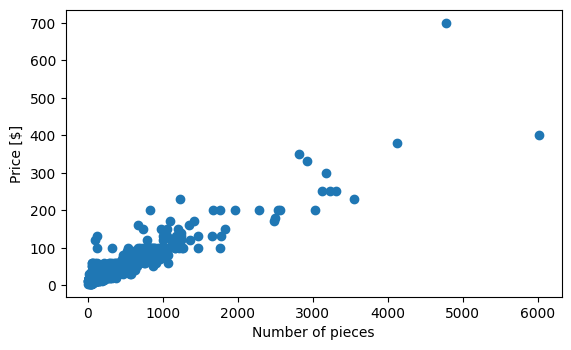

In [416]:
# Antall brikker mot pris
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Number of pieces')
plt.ylabel('Price [$]')
plt.gca().set_aspect(5)
plt.show()

## Kryssplott med regresjonslinje

In [417]:
def LRLine(formel, slope_value):
    resultat = enkelLineærRegresjon(formel)

    slope = resultat.params[slope_value]
    intercept = resultat.params['Intercept']

    regression_x = np.array(df2[slope_value])
    regression_y = slope * regression_x + intercept

    plt.scatter(df2[slope_value], df2['Price'], label='Data Points')
    plt.plot(regression_x, regression_y, color='red', label='Regression Line')
    plt.xlabel('Number of ' + slope_value)
    plt.ylabel('Price [$]')
    plt.title('Kryssplott med regresjonslinje (enkel LR)')
    plt.legend()
    plt.grid()
    plt.show()

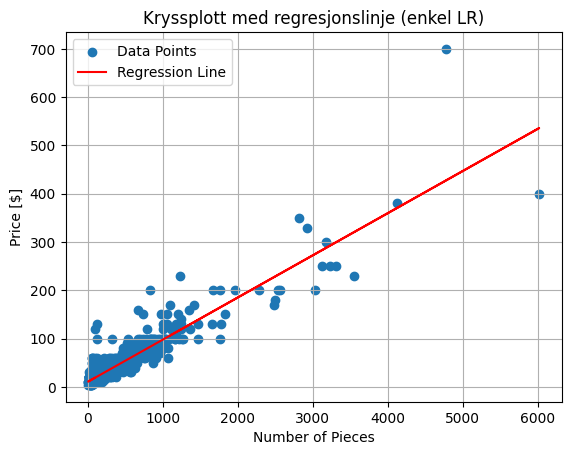

In [418]:
LRLine(pieces_formel, 'Pieces')

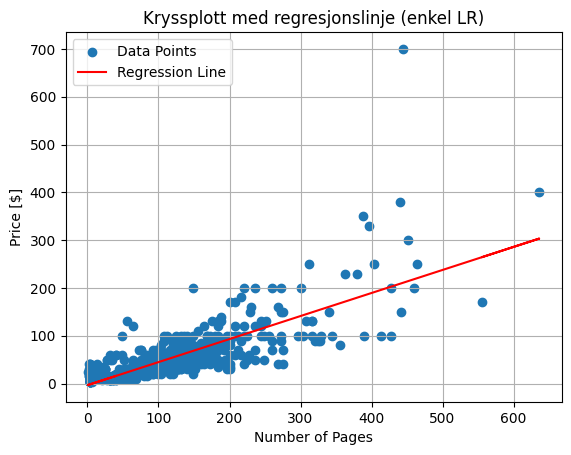

In [419]:
LRLine(pages_formel, 'Pages')

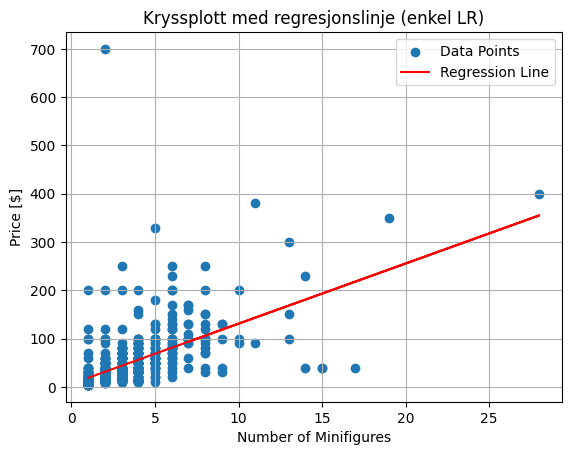

In [420]:
LRLine(minifigures_formel, 'Minifigures')

In [421]:
df2.groupby(['Theme']).size().reset_index(name = 'Count')

,Theme,Count
0,Batman,16
1,City,94
2,Classic,4
3,Creator 3-in-1,21
4,Creator Expert,10
5,DC,8
6,DUPLO,32
7,Disney,35
8,Friends,94
9,Harry Potter,22


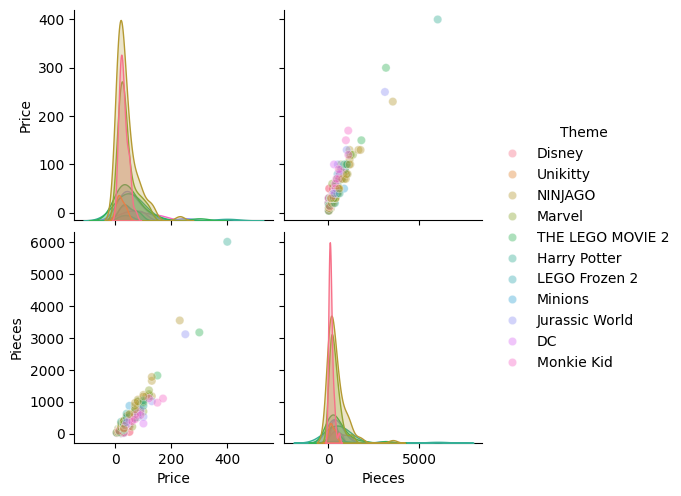

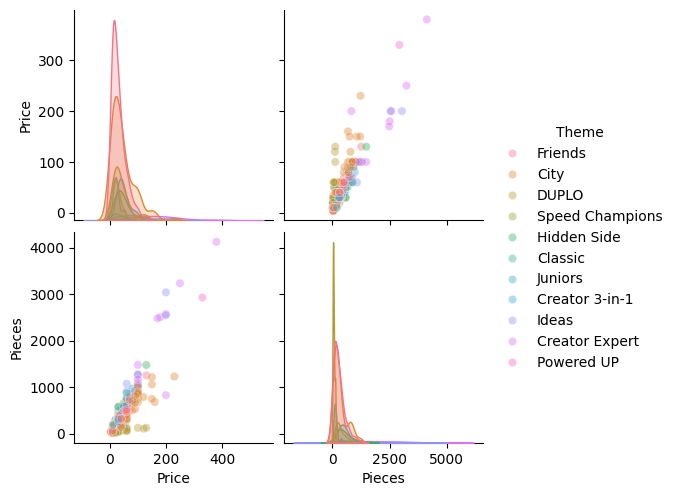

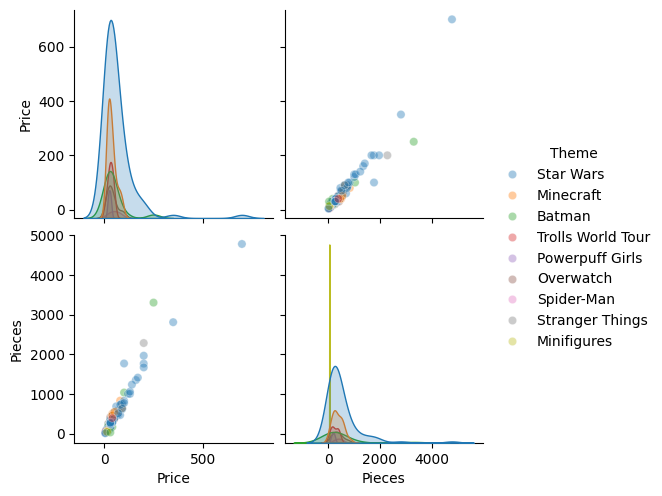

In [422]:
def showMultipleScatterPlotts(arr):
    subset_df = df2[df2['Theme'].isin(arr)]
    sns.pairplot(subset_df, vars = ['Price', 'Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
    plt.show()


showMultipleScatterPlotts(mythemes_brands)
showMultipleScatterPlotts(mythemes_notBrands)
showMultipleScatterPlotts(mythemes_unclearBrands)

## Enkel LR med flere regresjonslinjer (ikke multippel LR)

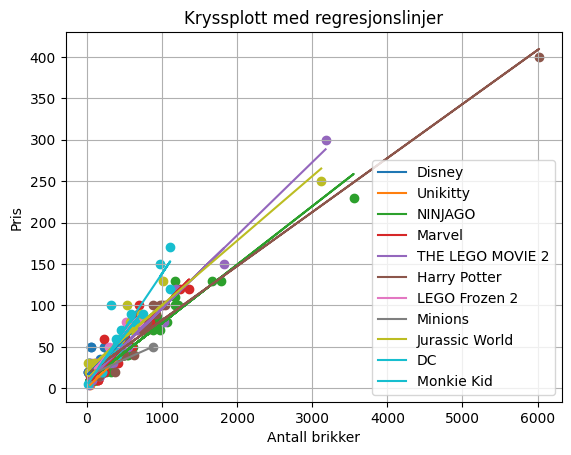

In [423]:
subset_df = df2[df2['Theme'].isin(mythemes_brands)]
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes_brands):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes_brands):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [424]:
def showMultipleRegressionLine(arr):
    resultater = []
    for theme in arr:
        theme_subset = df2[df2['Theme'] == theme]
        if theme_subset.empty:
            print(f"No data for theme: {theme}")
            continue
        model = smf.ols('Price ~ Pieces', data=theme_subset).fit()
        resultater.append((theme, model))

    for theme, res in resultater:
        slope = res.params['Pieces']
        intercept = res.params['Intercept']

        theme_subset = df2[df2['Theme'] == theme]
        regression_x = np.array(theme_subset['Pieces'])
        regression_y = slope * regression_x + intercept

        plt.scatter(theme_subset['Pieces'], theme_subset['Price'], label=theme)
        plt.plot(regression_x, regression_y, label=f'{theme} Regression Line')

    plt.xlabel('Antall brikker')
    plt.ylabel('Pris')
    plt.title('Kryssplott med regresjonslinjer')
    plt.legend()
    plt.grid(True)
    plt.show()


No data for theme: LEGO Education


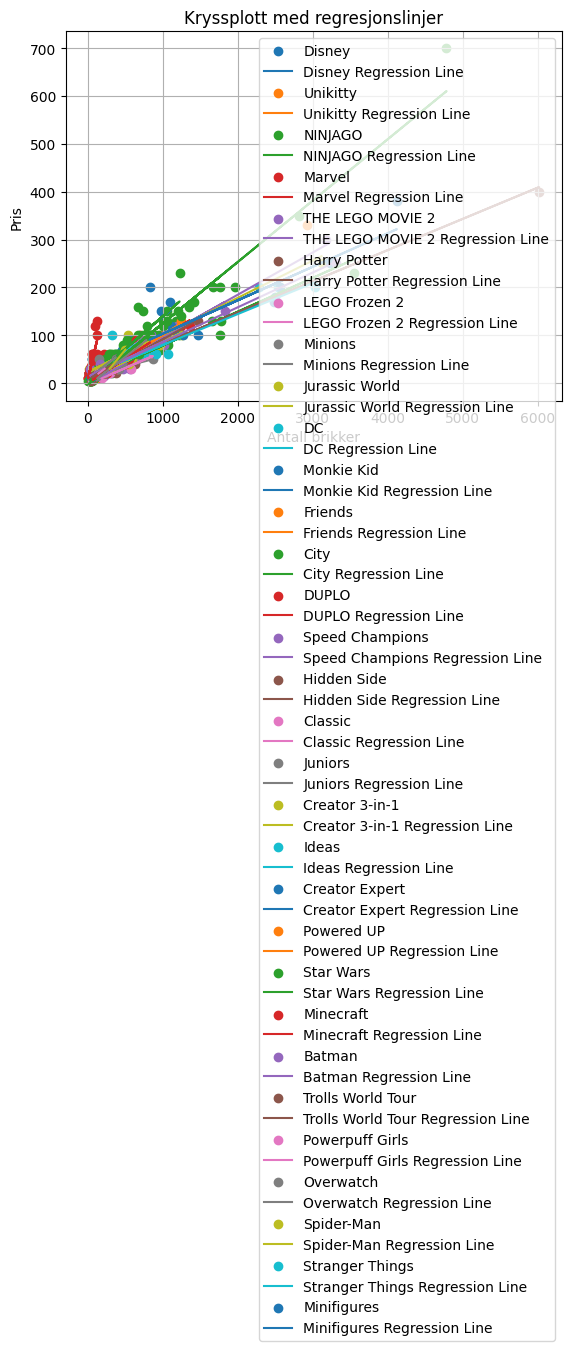

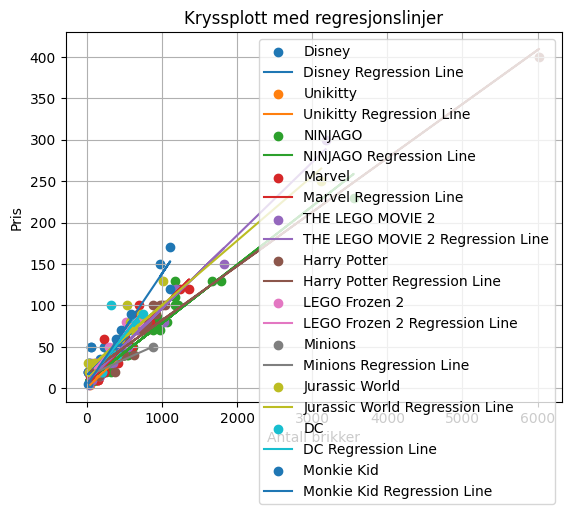

No data for theme: LEGO Education


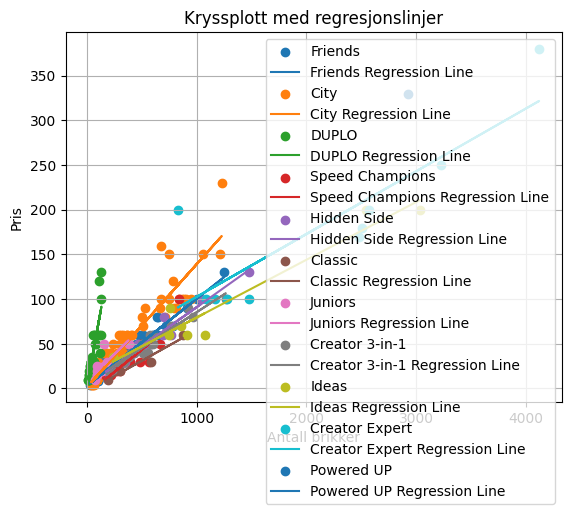

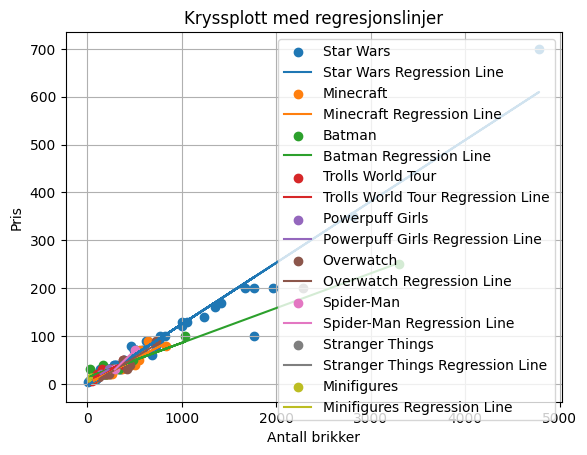

In [425]:
showMultipleRegressionLine(mythemes_all)
showMultipleRegressionLine(mythemes_brands)
showMultipleRegressionLine(mythemes_notBrands)
showMultipleRegressionLine(mythemes_unclearBrands)

## Evaluering av modeller

In [426]:
def showQQPlot(formel, dataframe):
    # Steg 5: Evaluere om modellen passer til dataene
    # med interaksjonsledd mellom antall brikker og tema

    modell3_mlri = smf.ols(formel, data = dataframe)
    modell3_mlri.fit().summary()

    # Plotte predikert verdi mot residual

    figure, axis = plt.subplots(1, 2, figsize = (15, 5))
    sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
    axis[0].set_ylabel("Residual")
    axis[0].set_xlabel("Predikert verdi")

    # Lage kvantil-kvantil-plott for residualene
    sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
    axis[1].set_ylabel("Kvantiler i residualene")
    axis[1].set_xlabel("Kvantiler i normalfordelingen")
    plt.show()

In [427]:
def MLR(formel, dataframe):
    modell = smf.ols(formel, data = dataframe)
    resultat = modell.fit()
    return resultat.summary()

In [428]:
# mlr_formel = 'Price ~ C(Varemerke, Treatment("Unclear")) + Pieces + Pages + Minifigures'
# Denne formelen er definert lengere opp i notebooken.
MLR(mlr_formel, df2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.72e-285
Time:                        23:31:27   Log-Likelihood:                -3191.2
No. Observations:                 714   AIC:                             6390.
Df Residuals:                     710   BIC:                             6409.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         12.8427      1.876      6.847      0.000       9.160      16.525
C(Varemerke, Treatment("Unclear"))[T.Brand]       -5.0295      2.201     -2.285      0.023      -9.351      -0.708
C(Varemerke, Treatment("Unclear"))[T.Original]    -1.8033      2.132     -0.846      0.398      -5.989       2.382
Pieces                                             0.0873      0.001     61.742      0.000       0.085       0.090
==============================================================================
Omnibus:                      653.532   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58679.662
Skew:                           3.672   Prob(JB):                         0.00
Kurtosis:                      46.801   Cond. No.                     2.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

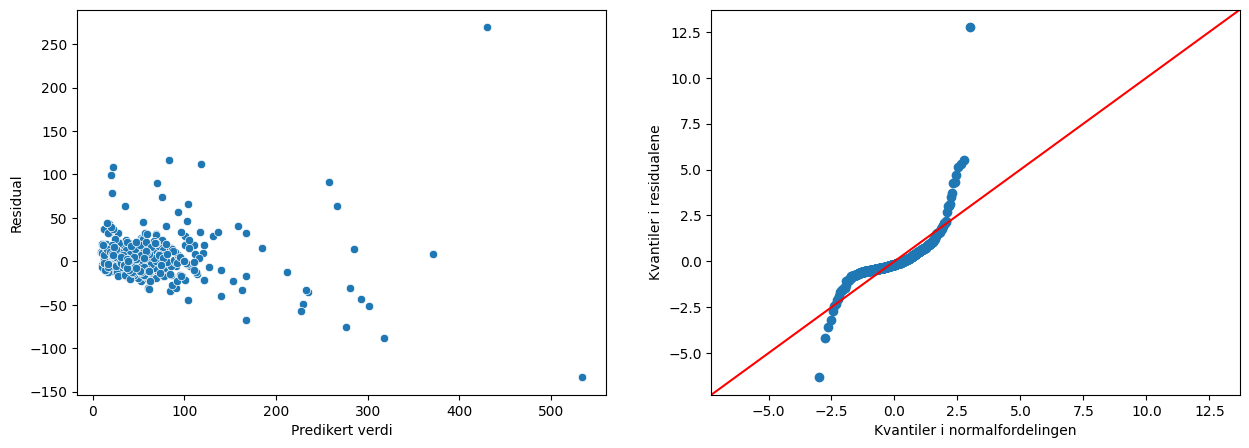

In [429]:
showQQPlot(mlr_formel, df2)

In [430]:
def estimatedValue(varemerke, pieces):
    selected_varemerke = 0
    match (varemerke):
        case "Original":
            selected_varemerke = -1.8033
        case "Brand":
            selected_varemerke = -5.0295
        case _:
            selected_varemerke = 0
    return round(12.8427 + selected_varemerke + (0.0873 * pieces), 2)

In [431]:
for i in range(1900, 2400):
    if not (df2.loc[df2['Pieces'] == i]).empty:
        print(df2.loc[df2['Pieces'] == i], "\n")

                Set_Name      Theme   Price  Pieces  Pages  Minifigures  \
1160  Y-wing Starfighter  Star Wars  199.99  1967.0  220.0          2.0   

      Unique_Pieces Varemerke  
1160          359.0   Unclear   

            Set_Name            Theme   Price  Pieces  Pages  Minifigures  \
793  The Upside Down  Stranger Things  199.99  2287.0  300.0          8.0   

     Unique_Pieces Varemerke  
793          533.0   Unclear   



In [432]:
print("Marvel (Original price = 119.99 $): ", estimatedValue("Brand", 1363.0))
print("Hidden Side (Original price = 129.99 $): ", estimatedValue("Original", 1474.0))

Marvel (Original price = 119.99 $):  126.8
Hidden Side (Original price = 129.99 $):  139.72


In [433]:
print("Original price on sets below: 149.99 \n")

print("Capital City (City) estimated price = ", estimatedValue("Original", 1211.0))
print("Rocket Assembly & Transport (City) estimated price = ", estimatedValue("Original", 1055.0))
print("Ocean Exploration Ship (City) estimated price = ", estimatedValue("Original", 745.0))

print("The Rexcelsior! (TLM2) estimated price = ", estimatedValue("Brand", 1826.0))
print("Monkey Kong Warrior Mech (Monkie Kid) estimated price = ", estimatedValue("Brand", 975.0))

print()

print("Original price on sets below: 99.99 \n")

print("Yoda (Star Wars) estimated price = ", estimatedValue("Unclear", 1771.0))
print("Deep Space Rocket and Launch Control (City) estimated price = ", estimatedValue("Original", 837.0))
print("Avengers Compound Battle (Marvel) estimated price = ", estimatedValue("Brand", 699.0))

print()

print("Original price on sets below: 49.99 \n")

print("Junkrat & Roadhog (Overwatch) estimated price = ", estimatedValue("Unclear", 380.0))
print("Haunted Fairground (Hidden Side) estimated price = ", estimatedValue("Original", 466.0))
print("Buzz & Woody's Carnival Mania! (Disney) estimated price = ", estimatedValue("Brand", 230.0))

Original price on sets below: 149.99 

Capital City (City) estimated price =  116.76
Rocket Assembly & Transport (City) estimated price =  103.14
Ocean Exploration Ship (City) estimated price =  76.08
The Rexcelsior! (TLM2) estimated price =  167.22
Monkey Kong Warrior Mech (Monkie Kid) estimated price =  92.93

Original price on sets below: 99.99 

Yoda (Star Wars) estimated price =  167.45
Deep Space Rocket and Launch Control (City) estimated price =  84.11
Avengers Compound Battle (Marvel) estimated price =  68.84

Original price on sets below: 49.99 

Junkrat & Roadhog (Overwatch) estimated price =  46.02
Haunted Fairground (Hidden Side) estimated price =  51.72
Buzz & Woody's Carnival Mania! (Disney) estimated price =  27.89


# Hypotesetestinger

Dette tar utgangspunkt i MLR, hvor hver enkelt forklaringsvariabel, i tillegg til de kategoriske,
for å gi et helhetlig bilde på om de forskjellige variablene faktisk har en effekt på pris.

Her er det viktig å se at de variablene som ikke skal testes er likt for H0 og H1.

### Sjekker hypotesten for den kategoriske variablen varemerke

Her vil brikker, sider og minifigurer være det samme for H0, H1 og H2

In [434]:
# H0: Varen er "Unclear":

H_0 = estimatedValue("Unclear", 2000)
print("Unclear: ", H_0)

# H1: Varen er "Original":

H_1 = estimatedValue("Original", 2000)
print("Original: ", H_1)

# H2: Varen er "Brand":

H_2 = estimatedValue("Brand", 2000)
print("Brand: ", H_2)


Unclear:  187.44
Original:  185.64
Brand:  182.41


### Hvordan tolke disse dataene

Her må vi se på P > |t| verdiene til de forskjellige hypotesene.

"Unclear" er dratt inn som standard, så denne vil ha p-verdi ≈ 0

"Original" har en p-verdi = 0.115. Dette er IKKE innenfor intervallet vårt (0.05 er grensen), som gjør at H0-hypotesen SKAL forkastes mot for H1-hypotesen.

"Brand" har en p-verdi = 0.008. Dette er innenfor intervallet vårt, som gjør at H0-hypotesen IKKE skal forkasten mot for H2-hypotesen.

### Hva videre

Dataene våre sier derimot at prisen endrer seg gitt ulik kategori for varemerke. En vare innenfor "Unclear" koster mest, mens "Original" koster litt mindre, og "Brand" har den minste antatte prisen utifra modellen vår.